In [2]:
from math import pi, sqrt, e, log
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Max sneeze particle velocity is 6 m/s. [Nishimura 2013]

#the particle can travel 0.005 m per pulse.

max_velocity = 6.0 
max_allowable_distance = 0.005 #m
max_interval = max_allowable_distance/max_velocity

repetition_freq = 1.0/max_interval


pulse_duration = 1e-6 #seconds


duty_cycle = repetition_freq * pulse_duration 

pulse_power_draw = 2.0*80e-3 # volts * amps - not equivalent to the RF output power, do note

average_power = duty_cycle * pulse_power_draw #watts

#battery_capacity = 0.1575 #watt-hours - a single LR44 zinc cell
battery_capacity = 1.725

battery_life_months = (battery_capacity / average_power) / 24 / 30 # months



In [4]:
pulse_RF_output_power_watts = 0.125 # watts

exposure_area = (0.01**2.0) #m

exposure_flux_w_m2 = pulse_RF_output_power_watts / exposure_area
exposure_flux_w_m2

1250.0

360.00000000000006

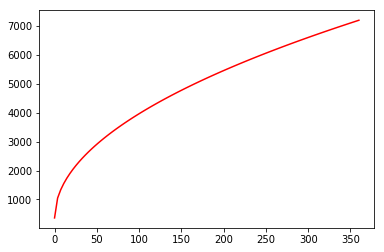

In [13]:
#ICNIRP 2020, Table 3, General Public.
#HEALTH PHYS118(5): 483–524; 2020
#PUBLISHED AHEAD OF PRINT IN MARCH 2020: HEALTH PHYS 118(00):000–000; 2020
# The key is that the "Basic Restrictions are averaged over a 6-minute period".
#
# t is time in seconds, and restrictions must be satisfied for all values of t between >0 and <360 s, 
# regardless of the temporal characteristics of the exposure itself.
# Local Uab is to be averaged over a square 4-cm^2 surface area of the body.
# Exposure from any pulse, group of pulses, or subgroup of pulses in a train, as well as from 
# the summation of exposures (including non-pulsed
# EMFs), delivered in t s, must not exceed these levels.
#
# The SA and U ab values are conservative in that they are
# not sufficient to raise Type 1 or Type 2 tissue temperatures
# by 5 or 2°C, respectively.

#there's also Table 7, giving the equation 
#55/f G 0.177

#Converted from kJ/m^2
def specific_energy_j_m2(t):
    return 7.2*(0.05+0.95*((t/360.0)**0.5))*1000.0 # J/m^2

#t = 0

t = np.linspace(0,360,100)

plt.plot(t,specific_energy_j_m2(t), 'r')

specific_energy_j_m2(0)

In [ ]:
# Or is it Table 7

ValueError: x and y must have same first dimension, but have shapes (11999,) and (11998,)

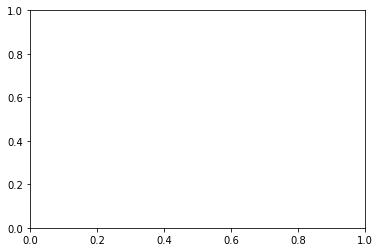

In [6]:
pulse_t = np.linspace(0,1,int(repetition_freq*10))

guideline_energy_integral_J_m2 = 0
guideline_energy = []

pulse_energy_integral_J_m2 = 0
pulse_energy = []

for idx,t_ in enumerate(pulse_t[0:-1]):
    dt = (pulse_t[idx+1]-t_)
    
    pulse_energy_integral_J_m2 += pulse_RF_output_power_watts * dt / exposure_area

    
    guideline_energy_integral_J_m2 = (specific_energy_j_m2(t_))       
    guideline_energy.append(guideline_energy_integral_J_m2)
    pulse_energy.append(pulse_energy_integral_J_m2)

#wait, we could have just symbolically integrated this. oh well. 
#I guess this is more flexible in terms of step response? Nah, just being dumb.
#no, wait, isn't that equation already an integral over energy?

plt.plot(pulse_t[0:-1], guideline_energy[0:-1], 'r')
plt.plot(pulse_t[0:-1], pulse_energy[0:-1], 'g')

pulse_energy_integral * repetition_freq

In [ ]:
#Penetration depth from 
# Osepchuk
# Raymond Kwok
# and Hand
# might have the wrong formula, however.
input_field = 250000.0
required_field = 300.0

factor = required_field/input_field

#Hand 1982 
# 40 mm for dry tissue,
# 5 mm for wet 
# at 8 GHz.
gamma = 0.005

depth = log(1.0/(factor))*gamma # this is not right.
depth*1000.0


